<a href="https://www.kaggle.com/code/adilhabib/coursera-courses-analysis?scriptVersionId=164696200" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coursera-dataset/CourseraDataset-Unclean.csv
/kaggle/input/coursera-dataset/CourseraDataset-Clean.csv


In [2]:
df = pd.read_csv("/kaggle/input/coursera-dataset/CourseraDataset-Clean.csv")
df

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,"Introducción al curso, Control de acceso y seg...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-secur...,14.0,30
8366,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,Flexible schedule,Not specified,"Education, want, Resource, Causality","Course Orientation, Nested If/Else Part 1, Nes...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/block-programmi...,11.0,0
8367,Cómo combinar y analizar datos complejos,0.0,Not specified,Flexible schedule,Not specified,Not specified,"Estimación básica, Modelos, Vinculación de reg...","Richard Valliant, Ph.D.","University of Maryland, College Park",Social Sciences,https://www.coursera.org/learn/data-collection...,9.0,0
8368,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,"Introdução ao curso, Operações do Kubernetes, ...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-workl...,19.0,0


In [3]:
df.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   What you will learn             8370 non-null   object 
 5   Skill gain                      8370 non-null   object 
 6   Modules                         8337 non-null   object 
 7   Instructor                      8282 non-null   object 
 8   Offered By                      8370 non-null   object 
 9   Keyword                         8370 non-null   object 
 10  Course Url                      8370 non-null   object 
 11  Duration to complete (Approx.)  8370 non-null   float64
 12  Number of Review                83

In [5]:
df.shape

(8370, 13)

In [6]:
df.isnull().sum()

Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include="number").columns

In [9]:
df.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


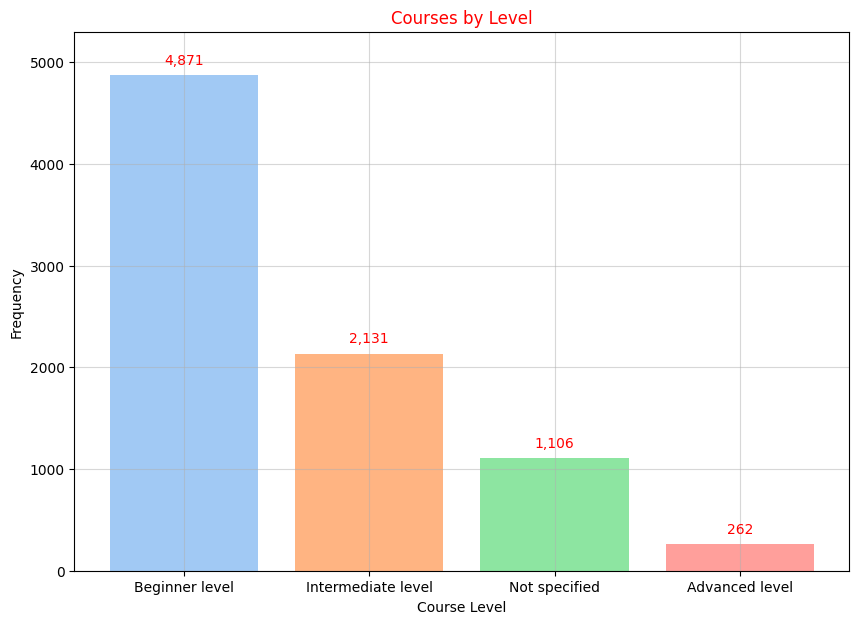

In [10]:
plt.figure(figsize=(10, 7))

plt.xticks(rotation=0)
counts = df.Level.value_counts()
bars = plt.bar(counts.index, counts.values, color=sns.color_palette("pastel"))

# Formatting the number with commas and displaying it above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 80, f"{height:,.0f}", ha='center', va='bottom', color='red')

plt.xlabel('Course Level')
plt.ylabel('Frequency')
plt.title('Courses by Level', color='red')

# Display both horizontal and vertical grid lines
plt.grid(axis='both', linestyle='-', alpha=0.5)
plt.ylim(0, 5300)
plt.show()

<Axes: xlabel='Level', ylabel='Duration to complete (Approx.)'>

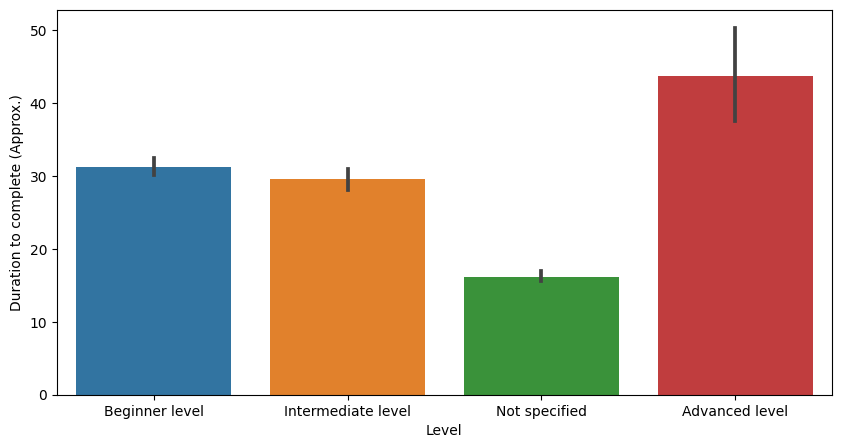

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(df, x='Level', y='Duration to complete (Approx.)')

<Axes: xlabel='Rating', ylabel='Duration to complete (Approx.)'>

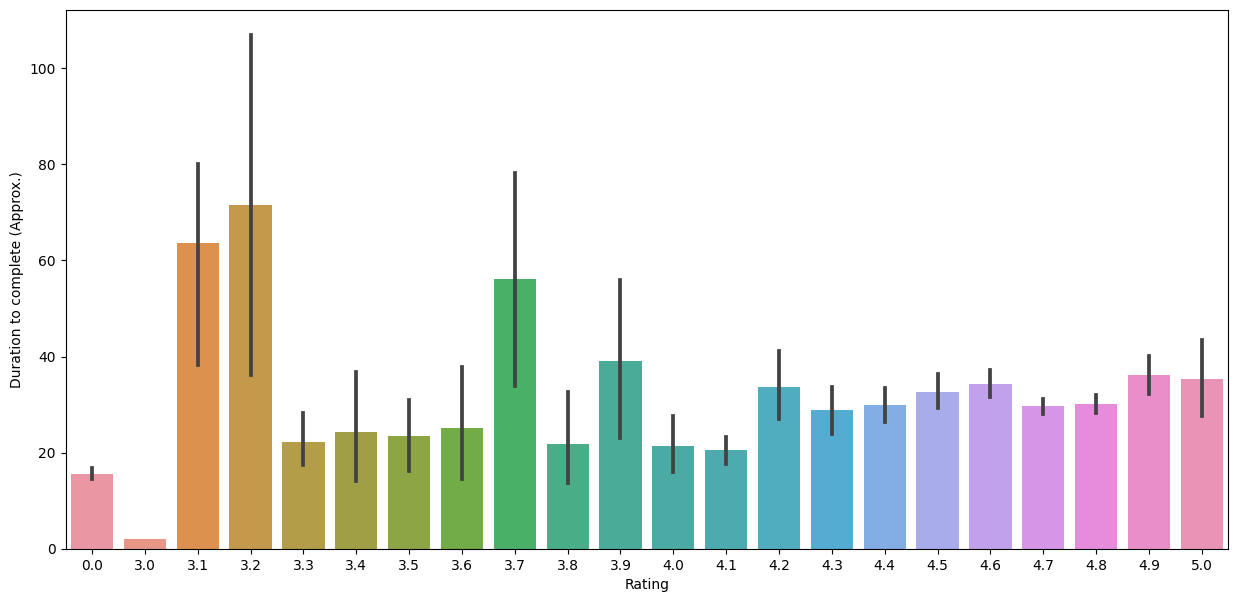

In [12]:
plt.figure(figsize=(15, 7))
sns.barplot(df, x='Rating', y='Duration to complete (Approx.)')

<Figure size 1000x700 with 0 Axes>

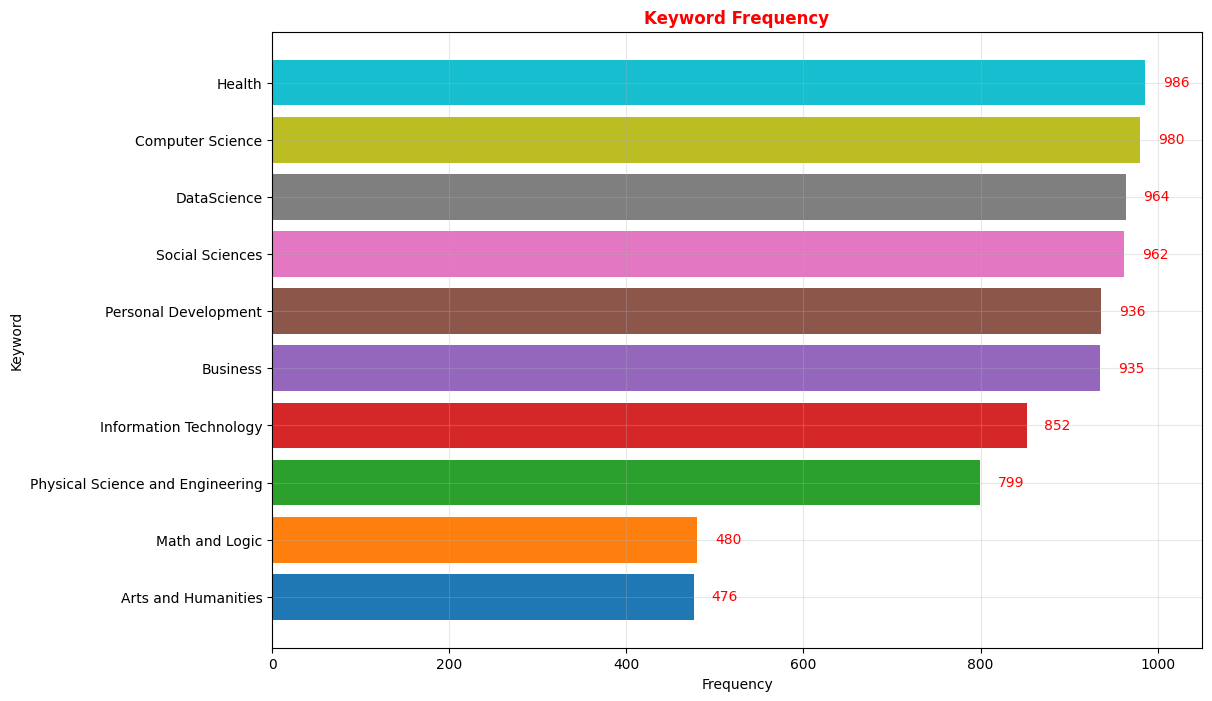

In [13]:
plt.figure(figsize=(10, 7))

counts = df.Keyword.value_counts()[::-1]
plt.figure(figsize=(12, 8))
bars = plt.barh(counts.index, counts.values, color=sns.color_palette())

# Formatting the number with commas and displaying it with a small distance from the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 20  # Adding a small distance from the end of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Keyword Frequency', color='red', fontweight='bold')

# Display both horizontal and vertical grid lines
plt.grid(axis='both', linestyle='-', alpha=0.3)

# Change the x-axis limit to 400,000
plt.xlim(0, 1050)
plt.show()

In [14]:
df.Schedule.value_counts()

Schedule
Flexible schedule    8048
Hands-on learning     322
Name: count, dtype: int64

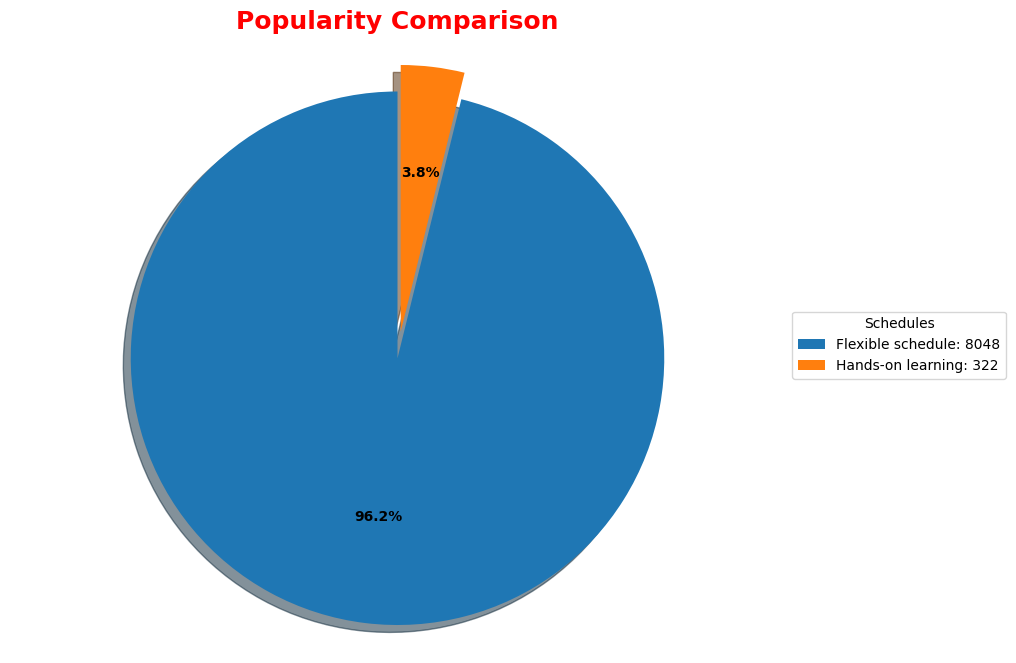

In [15]:
counts_dict = df.Schedule.value_counts().to_dict()

# Explode the slices for better visual clarity
explode = (0.05,) * len(counts_dict)  # 'explode' all slices equally a little bit

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(counts_dict.values(),
                                  autopct='%1.1f%%', startangle=90,
                                  colors=sns.color_palette(),
                                  explode=explode, shadow=True)

# Prepare legend labels with counts
legend_labels = [f'{key}: {value}' for key, value in counts_dict.items()]

ax.legend(wedges, legend_labels,
          title="Schedules",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")  # Set the autopct texts with bold font weight
plt.setp(texts, size=12, weight="bold")  # Set the labels with bold font weight

plt.title("Popularity Comparison", fontsize=18, color='red', fontweight='bold')
plt.axis('equal')

plt.show()

In [16]:
skills = ''
for skill in df['Skill gain']:
    skills += skill.lower() 
    skills += ', '
skills = skills.split(', ')
skills[:10]

['art history',
 'art',
 'history',
 'creativity',
 'not specified',
 'not specified',
 'not specified',
 'music',
 'chord',
 'jazz']

In [17]:
from collections import Counter
counts = Counter(skills) 
common_skills = counts.most_common(16)
common_skills

[('not specified', 2699),
 ('data analysis', 358),
 ('python programming', 357),
 ('machine learning', 237),
 ('communication', 207),
 ('data visualization', 196),
 ('data science', 179),
 ('leadership', 155),
 ('cloud computing', 154),
 ('sql', 150),
 ('computer programming', 144),
 ('problem solving', 131),
 ('r programming', 126),
 ('artificial intelligence (ai)', 115),
 ('marketing', 114),
 ('project management', 103)]

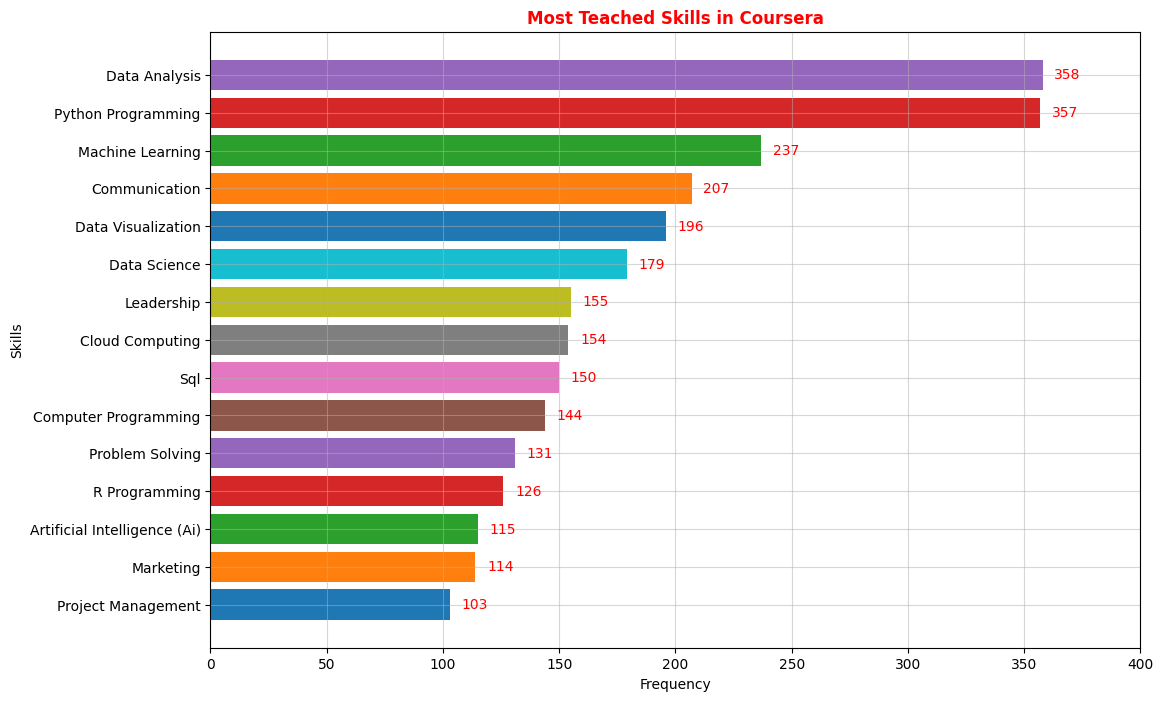

In [18]:
labels, values = zip(*common_skills[1:]) # before merging the similar keywords
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette())

# Formatting the number with commas and displaying it with a small distance from the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 5  # Adding a small distance from the end of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Most Teached Skills in Coursera', color='red', fontweight='bold')

# Display both horizontal and vertical grid lines
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Change the x-axis limit to 400,000
plt.xlim(0, 400)
plt.show()

In [19]:
instructors = ''
for instructor in df.Instructor.dropna():
    instructors += instructor
    instructors += ', '
instructors = instructors.split(', ')
instructors[:10]

['Anna Burckhardt',
 'Paola Antonelli',
 'Michelle Millar Fisher',
 'Stephanie Kramer',
 'Cary Nelson',
 'Andrew Dennis',
 'Ricardo Guimaraes',
 'Eduardo de la Vara Brown.',
 'Dariusz Terefenko',
 'Kristin Wendland']

In [20]:
from collections import Counter
counts = Counter(instructors) 
common_instructors = counts.most_common(15)
common_instructors

[('PhD', 508),
 ('Google Career Certificates', 305),
 ('Ph.D.', 291),
 ('Google Cloud Training', 225),
 ('MD', 148),
 ('Rav Ahuja', 139),
 ('IBM Skills Network Team', 110),
 (' Microsoft', 79),
 ('Taught by Meta Staff', 72),
 ('MPH', 72),
 ('Joseph Santarcangelo', 61),
 ('Alfaisal.KLD', 53),
 ('Ramesh Sannareddy', 44),
 ('Eddy Shyu', 44),
 ('CareerCatalyst ', 43)]

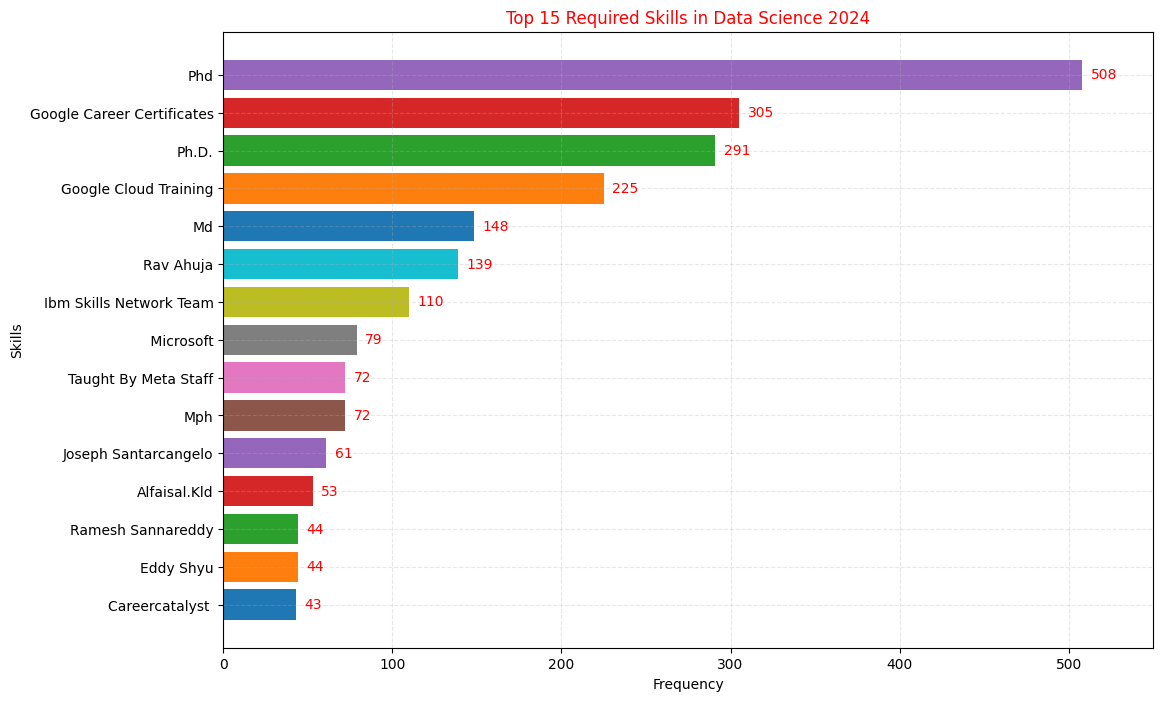

In [21]:
labels, values = zip(*common_instructors) # before merging the similar keywords
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette())

# Formatting the number with commas and displaying it with a small distance from the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 5  # Adding a small distance from the end of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 Required Skills in Data Science 2024', color='red')

# Display both horizontal and vertical grid lines
plt.grid(axis='both', linestyle='--', alpha=0.3)

# Change the x-axis limit to 400,000
plt.xlim(0, 550)
plt.show()

In [22]:
df.groupby('Offered By')[['Rating', 'Duration to complete (Approx.)']].mean().sort_values(by='Rating', ascending=False)[:15]

,Rating,Duration to complete (Approx.)
Offered By,,
"DeepLearning.AI, Stanford University",4.900000,31.125000
Morehouse College,4.900000,15.000000
"Universidade de São Paulo, University of California, Irvine",4.900000,40.000000
Tufts University,4.900000,10.000000
Measure What Matters,4.900000,23.000000
"Stanford University, DeepLearning.AI",4.900000,80.000000
"University of Cape Town, Oxfam",4.900000,20.000000
Radio y Televisión Española,4.900000,4.000000
"Fundação Lemann, Instituto Península",4.900000,14.000000


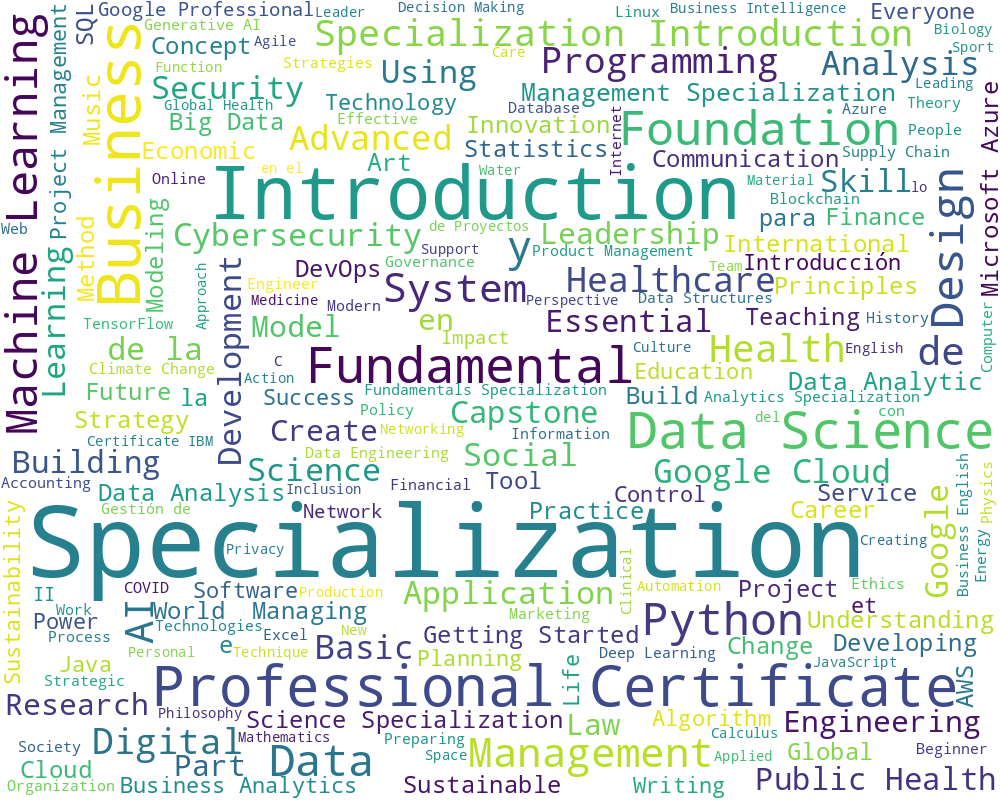

In [23]:
import wordcloud
from wordcloud import STOPWORDS
long_string = ' '.join(df['Course Title'])

stopwords = set(STOPWORDS)
stopwords.update(["and", "for", "the", "in", "of"])

word_cloud = wordcloud.WordCloud(background_color='white', stopwords=stopwords, width=1000, height=800)
word_cloud.generate(long_string)
word_cloud.to_image()

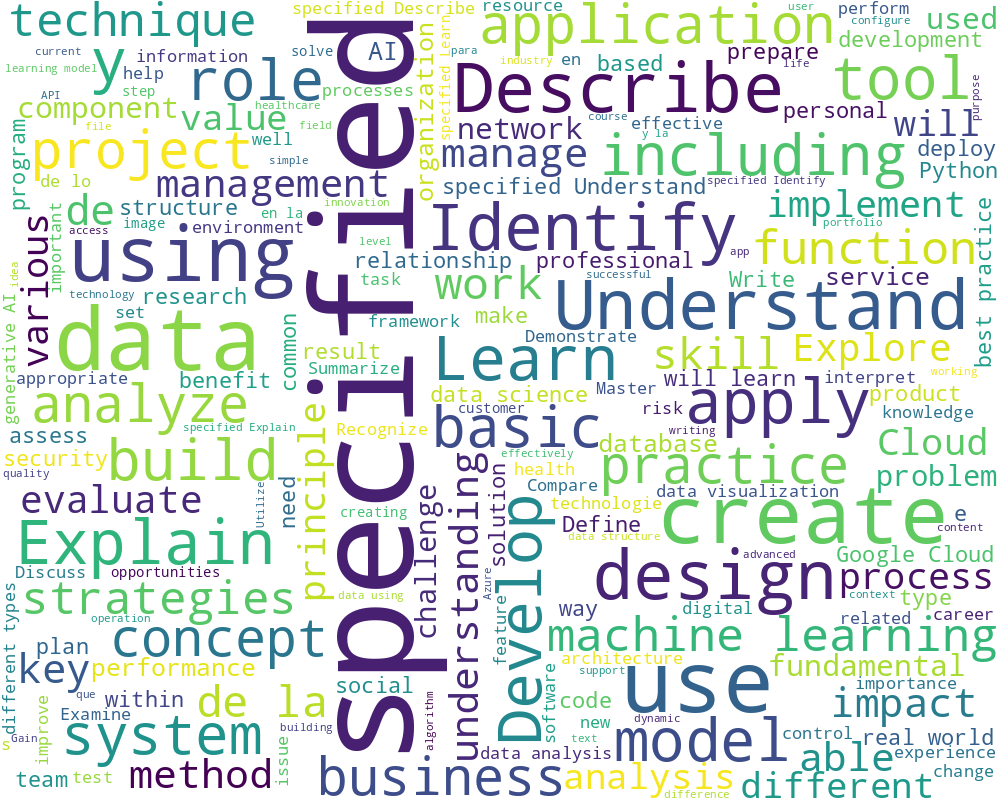

In [24]:
# Add specific stopwords
long_string = ' '.join(df['What you will learn'])

stopwords = set(STOPWORDS)
stopwords.update(["and", "for", "the", "in", "of"])

word_cloud = wordcloud.WordCloud(background_color='white', stopwords=stopwords, width=1000, height=800)
word_cloud.generate(long_string)
word_cloud.to_image()

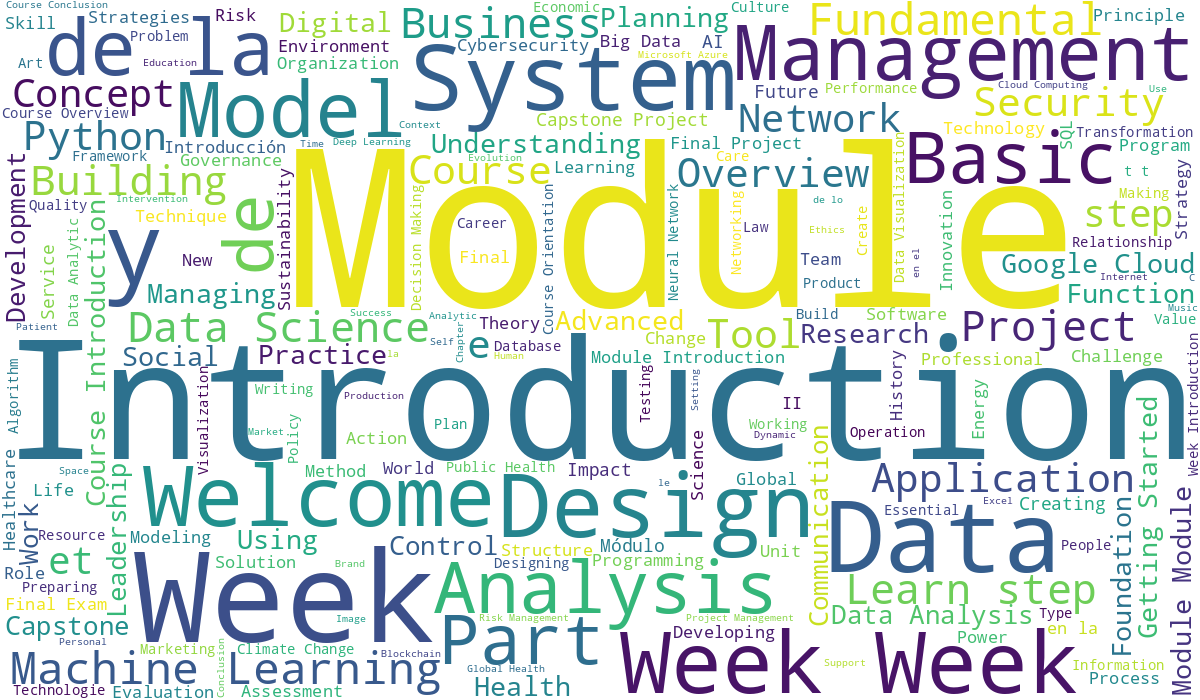

In [25]:
# Add specific stopwords
long_string = ' '.join(df['Modules'].dropna())

stopwords = set(STOPWORDS)
stopwords.update(["and", "for", "the", "in", "of"])

word_cloud = wordcloud.WordCloud(background_color='white', stopwords=stopwords, width=1200, height=700)
word_cloud.generate(long_string)
word_cloud.to_image()